In [1]:
using Random, PyPlot, Statistics
using LinearAlgebra

const T = Float64 # just getting the picture
const p = T.((170//100,50//100))

include("../simulations/cool-intervals.jl")

cool_intervals (generic function with 1 method)

In [2]:
# start with the backward-invariant unstable manifold between w_0 and w_1
beta = (p[1]-sqrt(p[1]^2+4p[2]))/2; alpha = -beta/(1+beta)
x_ref_end = -alpha/beta; x_ref_start = 1-p[1]*x_ref_end
Q = [1 -beta; beta 1]/sqrt(1+beta*beta)
Is = Q[2,:]*alpha .+ sqrt(1+beta*beta)*T.([1,0])*[x_ref_start x_ref_end]

# spinup
for i = 1:10000
    Is, Q, c, cw = cool_intervals(Is,Q,p)
end

attractor_endpts = Array{Float64}(undef,2,2,4000)
ch = Array{Float64}(undef,200000)
cwh = Array{Float64}(undef,200000)
for i = 1:200000
    Is, Q, c, cw = cool_intervals(Is,Q,p)
    i<=4000 && (attractor_endpts[:,:,i] = Float64.(mid.(Q*Is)))
    ch[i] = c
    cwh[i] = cw
end

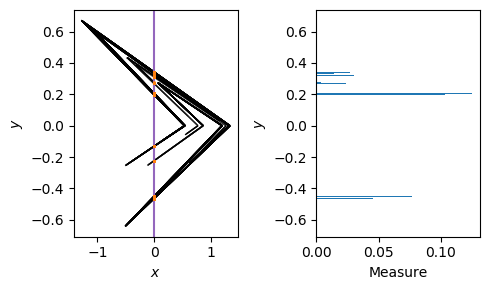

In [3]:
lines = [Float64.(mid.(attractor_endpts[:,:,i]')) for i = 1:500]
lwl = [1 ./norm(l[1,:] - l[2,:]) for l in lines]; lwl /= 3mean(lwl); lwl = min.(lwl,1)
figure(figsize=(5,3))
subplot(121)
attractor = matplotlib.collections.LineCollection(lines,
        linewidth=1.0,colors=[zeros(length(lines),3) lwl],zorder=1)
gca().add_collection(attractor)
plot([0],[0],c=[0,0,0,0]); yl = ylim() # plotting something quite dummy just to get the attractor's ylim
plot([0,0],[-10,10],"C4",label="\$\\mathcal{S}\$",zorder=1); ylim(yl)
scatter(zeros(1000),mid.(ch[1:1000]),c="C1",s=1,zorder=3)
# gca().set_aspect(1/p[2])
xlabel("\$x\$"); ylabel("\$y\$")

subplot(122)
bins = -0.5:0.0025:0.5;
hist(ch,weights=cwh/length(cwh),bins=bins,orientation="horizontal")
ylim(yl)
xlabel("Measure"); ylabel("\$y\$")

tight_layout()
savefig("../figures/CondMeasure.pdf")

In [77]:
# measure of \rho_\mathcal{S}
sum(cwh[isfinite.(cwh)])/length(cwh)

0.9210822565737633